In [10]:
import os
from mutagen.mp4 import MP4

def get_song_length(file_path):
    try:
        audio = MP4(file_path)
        length = audio.info.length
        return length
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

directory = '../songs'

for filename in os.listdir(directory):
    if filename.endswith(".m4a"):
        file_path = os.path.join(directory, filename)
        length = get_song_length(file_path)
        if length is not None:
            length_minutes = length / 60
            if length_minutes > 6:
                print(f"Eliminando archivo: {filename}")
                os.remove(file_path)

Eliminando archivo: 137 - Adele - Hello.m4a
Eliminando archivo: 164 - Aerosmith - Melt Down.m4a
Eliminando archivo: 168 - Aerosmith - Mother Popcorn.m4a
Eliminando archivo: 205 - Aerosmith - Something.m4a
Eliminando archivo: 244 - Air Supply - Believe In The Supernatural.m4a
Eliminando archivo: 294 - Air Supply - It's Never Too Late.m4a
Eliminando archivo: 308 - Air Supply - Miracles.m4a
Eliminando archivo: 314 - Air Supply - News From Nowhere.m4a
Eliminando archivo: 530 - Alice In Chains - Rotten Apple.m4a
Eliminando archivo: 590 - Allman Brothers Band - Old Friend.m4a
Eliminando archivo: 607 - Alphaville - Five Years.m4a
Eliminando archivo: 633 - Alphaville - The Opium Den.m4a
Eliminando archivo: 704 - Amy Grant - Ageless Medley.m4a
Eliminando archivo: 969 - Backstreet Boys - Everybody.m4a
Eliminando archivo: 1037 - Barbra Streisand - Auld Lang Syne.m4a
Eliminando archivo: 1288 - Bee Gees - Ghost Train.m4a
Eliminando archivo: 1330 - Bette Midler - Summer.m4a
Eliminando archivo: 1347 

In [11]:
import os
from mutagen.mp4 import MP4
import matplotlib.pyplot as plt

def get_song_length(file_path):
    try:
        audio = MP4(file_path)
        length = audio.info.length
        return length
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

def plot_song_lengths(directory):
    song_lengths = []
    song_names = []

    for filename in os.listdir(directory):
        if filename.endswith(".m4a"):
            file_path = os.path.join(directory, filename)
            length = get_song_length(file_path)
            if length is not None:
                if length/60 > 50:
                    print("file: ", filename)
                song_lengths.append(length / 60)  # Convert to minutes
                song_names.append(filename)
    
    if song_lengths:
        plt.figure(figsize=(10, 6))
        plt.barh(song_names, song_lengths, color='skyblue')
        plt.xlabel('Length (minutes)')
        plt.ylabel('Songs')
        plt.title('Length of All Songs in ../songs')
        plt.tight_layout()
        plt.show()
    else:
        print("No valid .m4a files found.")

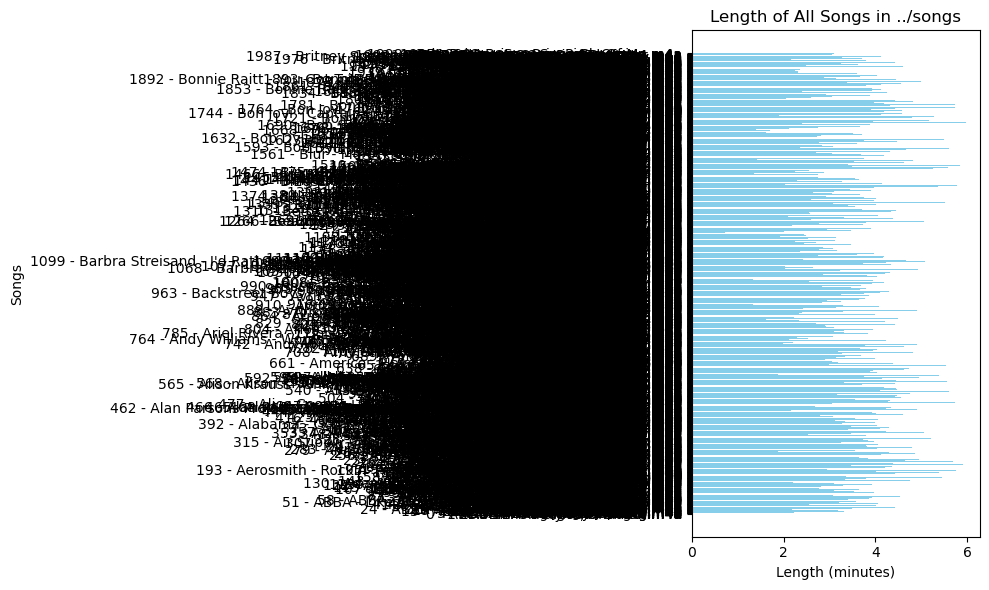

In [12]:
songs_directory = "../songs"
plot_song_lengths(songs_directory)

In [13]:
from multimediaFuncs import *

In [14]:
songs_directory = "../songs"
output_file = "song_features.csv"
features, filenames = process_songs(songs_directory)
save_features(features, filenames, output_file)
print(f"Features saved to {output_file}")

/home/adrianjcz/Desktop/bd2/BD2-Proyecto2/src/multimediaFuncs.py:133: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_path, sr=None)
/home/adrianjcz/.conda/envs/comfy/lib/python3.11/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/home/adrianjcz/Desktop/bd2/BD2-Proyecto2/src/multimediaFuncs.py:133: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_path, sr=None)
/home/adrianjcz/.conda/envs/comfy/lib/python3.11/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)
/home/adrianjcz/Desktop/bd2/BD2-Proyecto2/src/

Features saved to song_features.csv


features shape:  (971, 1300)


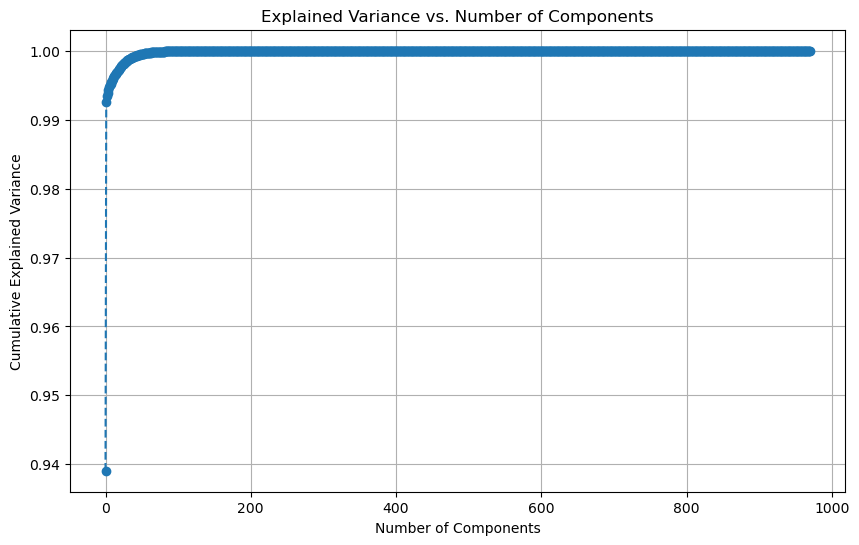

Variance needed to get 99\% of the data:  0.9925518732704404


In [15]:
# import pca
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

features_file = "../data/song_features.csv"
features, filenames = load_features(features_file)

print("features shape: ", features.shape)

pca = PCA()
pca.fit(features)

explained_variance = pca.explained_variance_ratio_
explained_variance_cumulative = np.cumsum(explained_variance)

plt.figure(figsize=(10, 6))
plt.plot(explained_variance_cumulative, marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()

plt.show()

print("Variance needed to get 99\% of the data: ", explained_variance_cumulative[explained_variance_cumulative > 0.99][0])

In [16]:
features_file = "./song_features.csv"
features, filenames = load_features(features_file)

reduced_features = reduce_dimensionality(features)

output_file = 'NEW_reduced_features.csv'
save_features(reduced_features, filenames, output_file)

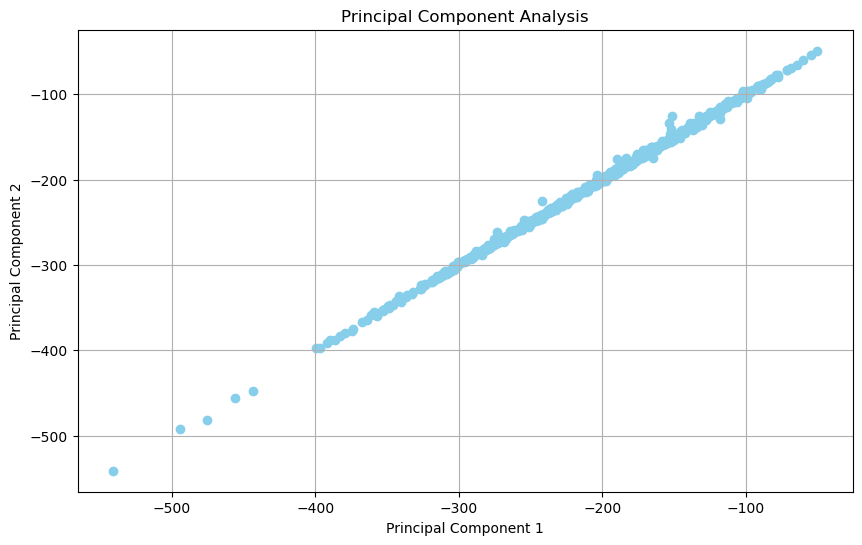

In [9]:
features_file = "../data/song_features.csv"
reduced_features, filenames = load_features(features_file)

#plot
plt.figure(figsize=(10, 6))
plt.scatter(reduced_features[:, 3], reduced_features[:, 4], color='skyblue')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis')
plt.grid()
plt.show()

In [6]:
from multimediaIndex import KNN_Faiss

features_file = "../data/song_features.csv"
features, filenames = load_features(features_file)

knn_faiss = KNN_Faiss(features)

/tmp/ipykernel_45859/3195506994.py:9: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_path, sr=None, duration=duration)
/home/adrianjcz/.conda/envs/comfy/lib/python3.11/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)



KNN-Faiss
987 - Backstreet Boys - Nowhere To Go.m4a
KNN Result: [(979, 40352260.0)]


In [9]:
short_input_path = "../temp/776 - Ariana Grande - Higher.m4a"  # Path to the short input file
query_vector = extract_features(short_input_path, duration=10)

k=1
knn_result = knn_faiss.knnSearch(query_vector, k)

print("KNN Result:", knn_result)
print(filenames[knn_result[0][0]])

KNN Result: [(771, 19454496.0)]
776 - Ariana Grande - Higher.m4a


/tmp/ipykernel_45859/3195506994.py:9: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_path, sr=None, duration=duration)
/home/adrianjcz/.conda/envs/comfy/lib/python3.11/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


#### PCA

In [10]:
from sklearn.decomposition import PCA   

features_file = "../data/song_features.csv"
features, filenames = load_features(features_file)  



# def reduce_dimensionality(features, n_components=50):
#     pca = PCA(n_components=n_components)
#     reduced_features = pca.fit_transform(features)
#     return reduced_features

# use pca and find the best n_components to represent 95% of the variance
pca = PCA(n_components=0.95)
reduced_features = pca.fit_transform(features)
print(f"Reduced features shape: {reduced_features.shape}")

Reduced features shape: (992, 244)
